# Taylor Approximation

In the realm of pharmacometrics, approximations are often the unsung heroes. They allow us to tackle complex problems with simplified models, saving time and resources while still yielding valuable insights. We'll delve into two powerful players: **First-Order Approximation** and **Laplacian Approximation**.

## The Magical Toolkit: Taylor Series Expansion
Before diving into the world of first-order and Laplacian approximations, it's essential to introduce their foundation: Taylor series expansion. Imagine a complex function, like a rollercoaster ride, whose behavior we want to understand. Taylor series allows us to approximate the function around a specific point by expressing it as an infinite sum of simpler terms involving its derivatives at that point. This elegant mathematical tool plays a crucial role in simplifying complex functions into a linear combination of the function evaluated at a specific point `x0` and derivatives of increasing degree. As the number of terms in the function increases, the approximation is accurate over a greater range of the function.

$$f(x)\approx f(x_0) + \frac{df}{dx}(x-x_0)+\frac{1}{2!}\frac{d^2f}{dx}(x-x_0)^2+...+\frac{1}{n!}\frac{d^nf}{dx}(x-x_0)^n$$

## Zero-Order Approximation
$$f(x) \approx f(x_0)$$
The zero-order approximation is like drawing a horizontal line at the point `x0`. It assumes that the function is constant around `x0`. This is the simplest approximation and works well when the function doesn't change much around `x0`. Then given `x` and `x0` are near each other, `f(x0)` should be a reasonable approximation of `f(x)`.

## First Order Approximation
$$f(x) \approx f(x_0) + f'(x_0)\times(x-x_0)$$
The first-order approximation introduces the **SLOPE** of the function at `x0`. It's like drawing a tangent line to the curve of the function at the point `x0`. This approximation considers both the value and the rate of change of the function at `x0`. It works well for functions with moderate changes in slope near the point `x0`.

## Laplacian Approximation (Second Order Approximation)
$$f(x) \approx f(x_0) + f'(x_0)\times(x-x_0)+ f''(x_0)\times(x-x_0)^2$$
The second-order approximation adds **CURVATURE** information to the linear approximation. It's like fitting a parabola to the function at `x0`. This level of approximation considers not only the value and slope but also the concavity (curvature) of the function at the point `x0`. The quadratic term allows for a more accurate representation, especially for functions with noticeable curvature.

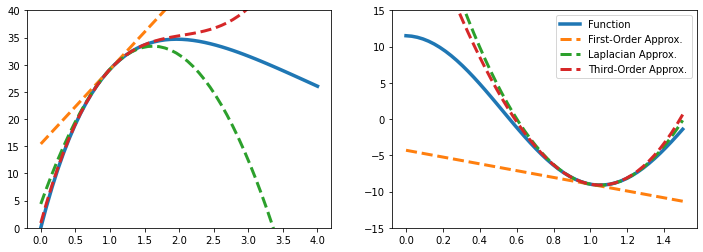

In [3]:
import jax.numpy as jnp
from jax import grad
from math import factorial
import matplotlib.pyplot as plt

def taylor_approx(func, x, x0=0., order=1):
    estimate = func(x0)
    for i in range(order):
        func = grad(func)
        delta = x - x0
        fact = factorial(i+1)
        estimate += func(x0) * delta**(i+1) / fact
    return estimate

# approximate x around x0 = 1

def f1(x):
    return 100 * (jnp.exp(-0.3*x) - jnp.exp(-0.8*x))
def f2(x):
    return 1.5*jnp.exp(-0.5*x) + 10*jnp.cos(x*3)

plt.figure(figsize=(12,4))

plt.subplot(121)
x = jnp.linspace(0, 4, 50)
plt.plot(x, f1(x), lw=3.5)
for i in range(3):
    plt.plot(x, taylor_approx(f1, x, x0=1., order=i+1), ls="--", lw=3)
plt.ylim(-0, 40)

plt.subplot(122)
x = jnp.linspace(0, 1.5, 50)
plt.plot(x, f2(x), lw=3.5)
for i in range(3):
    plt.plot(x, taylor_approx(f2, x, x0=1., order=i+1), ls="--", lw=3)
plt.ylim(-15, 15)
plt.legend(["Function", "First-Order Approx.", "Laplacian Approx.", "Third-Order Approx."])


## Reference
- Peter L. Bonate *Pharmacokinetic-Pharmacodynamic Modeling and Simulation - Appendix Taylor Series Approximation*